Initial setup change the path so can load various libraries etc


In [12]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
%matplotlib inline 

2018-11-06 12:53:49,738 DEBUG matplotlib.pyplot : Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import logging
FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")

2018-11-06 12:48:20,673 DEBUG root : Logging enabled


In [3]:
import os
import sys
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
import humans
import abstract_data




Using TensorFlow backend.


In [4]:
coco_data = humans.load_data(data_type="COCO", dataset=COCO_DIR,subset="minival", occlude_data_path=OCCLUDE_DIR, year=2014)

2018-11-06 12:48:22,800 DEBUG root : Loading data of type COCOm=, subset minival from location /data/AI/Data/coco
loading annotations into memory...
Done (t=0.71s)
creating index...
Data set type is instances
index created!
No coco data exists at /data/AI/Data/coco/annotations/panoptic_minival2014.json
2018-11-06 12:48:23,529 DEBUG root : Adding occlusions to the data
2018-11-06 12:48:23,531 DEBUG root : Loading occlusion data from /data/AI/Data/VOCdevkit/VOC2012
2018-11-06 12:49:35,030 DEBUG root : 1001 Occluders loaded


In [5]:
image_set = coco_data.load_images()

2018-11-06 12:49:38,504 DEBUG root : Adding occlusion information to images
2018-11-06 12:49:38,648 DEBUG root : Added occlusion information to images


2018-11-06 12:55:48,654 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,681 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,725 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,740 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,775 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,790 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,818 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,833 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,847 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 12:55:48,864 DEBUG matplotlib.axes._base : update_title_pos


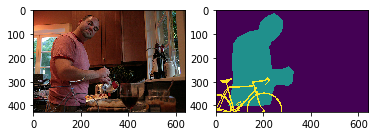

In [26]:
image = random.choice(image_set.images)
image_data = image.image_data.read_image()
masks = image.load_masks()
mask_1 = masks[:,:,0]
fig, axs = plt.subplots(1,2)
plt.sca(axs[0])
plt.imshow(image_data)
plt.sca(axs[1])
plt.imshow(mask_1)

In [ ]:
config = humans.HumanConfig()
logs = os.path.join(ROOT_DIR,"logs")
model_path= os.path.join(MODEL_DIR, "mask_rcnn_human_0018.h5")
model = humans.load_model(mode="inference", config=config, logs=logs, model=model_path, model_exclude=["mrcnn_mask"])
print("done")